In [4]:
!pip install mercury
!pip install oracledb
!pip install matplotlib
!pip install ipywidgets matplotlib

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: devscripts 2.22.1ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of devscripts or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pdfminer-six -VERSION- has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pdfminer-six or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: devscripts 2.22.1ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement i

In [3]:
import mercury as mr # for widgets
import oracledb
import random # for random data generation
from matplotlib import pyplot as plt # for chart
import time
import numpy as np
from ipywidgets import interactive

In [4]:
def plot_sine_wave(frequency=1.0):
    # 設置時間軸，從0到2，總共有1000個點
    t = np.linspace(0, 2, num=1000)
    # 計算正弦波的值
    y = np.sin(2 * np.pi * frequency * t)
    # 繪製正弦波
    plt.figure(figsize=(10, 4))
    plt.plot(t, y)
    plt.ylim(-1.1, 1.1)
    plt.title('正弦波')
    plt.xlabel('時間')
    plt.ylabel('振幅')
    plt.grid(True)
    plt.show()

# 創建一個互動式控件，滑動條控制頻率
interactive_plot = interactive(plot_sine_wave, frequency=(0.0, 10.0))
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='frequency', max=10.0), Output()), _dom_classes=('wid…

In [26]:
cs = oracledb.makedsn('oracle.cise.ufl.edu', '1521', service_name='orcl')
un = 'michaelbennie'
pw = 'GOxpdrdXBmxHTC0tfKflZZpB'  # 注意：在实际应用中最好使用环境变量或安全更好的方法来处理密码


def execute_sql_script(file_path):
    results=[]
    # 连接到数据库
    with oracledb.connect(user=un, password=pw, dsn=cs) as connection:
        # 创建一个新的游标
        cursor = connection.cursor()
        # 打开 SQL 文件并读取 SQL 命令
        with open(file_path, 'r', encoding='utf-8') as sql_file:
            sql_script = sql_file.readlines()

        line_counter = 0  #
        start_time = time.time()

        try:
            for line in sql_script:
                line = line.strip().strip(';')
                if(len(line)<2 or line[0:2]=="--"):
                    continue
                # 执行 SQL 脚本
                if line:
                    result = []
                    for a in cursor.execute(line):
                        result.append(a)
                        line_counter += 1
                        if line_counter % 100000 == 0:
                            elapsed_time = time.time() - start_time
                            print(f"Executed 100000 lines in {elapsed_time:.2f} seconds")
                            start_time = time.time()  # 重置开始时间
                            results.append(result) #this should be deleted later
                            return results
            print(f"Successfully executed script: {file_path}")
            results.append(result)
        except oracledb.DatabaseError as e:
            print(f"Error executing script {file_path}: {e}")
        finally:
            cursor.close()
        return results

In [16]:

app = mr.App(title="Static notebook", description="Display static notebook")


mercury.App

In [20]:
header = mr.Md("CIS4301 Databases Group Project")
name = mr.Text(label="What is your name?", value="Piotr")
points = mr.Slider(label="Number of points", value=75, min=50, max=100)
color = mr.Select(label="Select color", value="blue", choices=["red", "green", "blue"])


CIS4301 Databases Group Project

mercury.Text

mercury.Slider

mercury.Select

54

In [21]:

mr.Md(f"""## How are you {name.value}?
You can mix Python code and Markdown.""")


## How are you Piotr?
You can mix Python code and Markdown.

In [54]:
accidentData=execute_sql_script("../sqlScripts/selectAccidentData.sql")[0]
accidentData

Executed 100000 lines in 4.16 seconds


[(-121.94539, 37.31665),
 (-121.35045, 38.3648),
 (-121.69952, 38.55169),
 (-121.40146, 38.61801),
 (-122.38609, 37.49221),
 (-122.15521, 37.46877),
 (-121.37175, 38.45255),
 (-121.58083, 37.74136),
 (-121.31208, 38.66805),
 (-122.24796, 37.78735),
 (-121.14589, 38.78142),
 (-122.06819, 37.60871),
 (-121.71792, 38.54752),
 (-122.06575, 37.97778),
 (-121.85204, 37.33946),
 (-122.29626, 37.55368),
 (-122.41541, 37.73198),
 (-122.21976, 37.85448),
 (-122.03964, 37.99259),
 (-121.26548, 38.58997),
 (-121.11116, 39.32864),
 (-121.39613, 38.48169),
 (-122.1444, 37.46242),
 (-121.91247, 38.40491),
 (-121.24709, 38.74442),
 (-121.55681, 38.20373),
 (-121.59188, 38.67106),
 (-121.3363, 38.56614),
 (-121.29964, 38.84626),
 (-121.51388, 38.5642),
 (-120.84744, 38.68232),
 (-122.51317, 37.92349),
 (-122.14017, 37.69244),
 (-121.98974, 37.80439),
 (-121.95821, 37.25217),
 (-121.91128, 37.70165),
 (-122.47562, 37.80707),
 (-122.07467, 37.69056),
 (-121.33549, 37.76699),
 (-121.77966, 37.70004),
 (-1

In [69]:
points = mr.Slider(label="Longitude", value=-90, min=-140, max=-70)


mercury.Slider

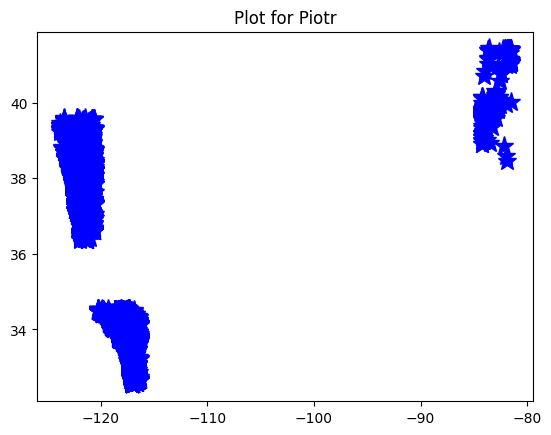

In [70]:
x = [point[0] for point in accidentData if point[0]<points.value]
y = [point[1]  for point in accidentData if point[0]<points.value]
_ = plt.plot(x,y, '*', markersize=14, color=color.value)
_ = plt.title(f"Plot for {name.value}")